In [1]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

from threeML import *

import warnings
warnings.simplefilter("ignore")

#plt.style.use('thomas')

[WARNING ] The naima package is not available. Models that depend on it will not be available
[WARNING ] The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it will not be available.
[WARNING ] The ebltable package is not available. Models that depend on it will not be available
[INFO    ] Starting 3ML!
[WARNING ] ROOT minimizer not available
[WARNING ] PyGMO is not available
[WARNING ] The cthreeML package is not installed. You will not be able to use plugins which require the C/C++ interface (currently HAWC)
[WARNING ] Could not import plugin HAWCLike.py. Do you have the relative instrument software installed and configured?
[WARNING ] Could not import plugin FermiLATLike.py. Do you have the relative instrument software installed and configured?



WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


WARNING RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject



[WARNING ] Env. variable OMP_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML
[WARNING ] Env. variable MKL_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML
[WARNING ] Env. variable NUMEXPR_NUM_THREADS is not set. Please set it to 1 for optimal performances in 3ML


<h3>Models from Shing Chi with different mixing ratios</h3>

In [2]:
df00 = pd.read_csv('spectra_LOGS_Mesa45_CO120_mixCO00b_mdot1e-9.csv')
df01 = pd.read_csv('spectra_LOGS_Mesa45_CO120_mixCO01b_mdot1e-9.csv')
df02 = pd.read_csv('spectra_LOGS_Mesa45_CO120_mixCO02b_mdot1e-9.csv')
df03 = pd.read_csv('spectra_LOGS_Mesa45_CO120_mixCO03b_mdot1e-9.csv')
df04 = pd.read_csv('spectra_LOGS_Mesa45_CO120_mixCO04b_mdot1e-9.csv')
df05 = pd.read_csv('spectra_LOGS_Mesa45_CO120_mixCO05b_mdot1e-9.csv')

df_arr = [df00,df01,df02,df03,df04,df05]

<h3>The csv files all have the same structure, so we build a function to read them in the same way:</h3>

In [3]:
def make_arrays(df):

    # energies are in MeV, but need in keV so multiply by 1e3
    elo = df['Elo'].values*1e3
    ehi = df['Ehi'].values*1e3
    ecen = 0.5*(elo+ehi)
    ewid = (ehi-elo)

    # time for spectrum
    t_arr = np.array([0.01,0.03,0.06,0.12,0.20,0.25,0.50,1.00,2.00]) # days

    # fluxes are in ph/cm2/s/MeV, but need in ph/cm2/s/keV, so divide by 1e3
    f001 = df['day001'].values/1e3
    f003 = df['day003'].values/1e3
    f006 = df['day006'].values/1e3
    f012 = df['day012'].values/1e3
    f020 = df['day020'].values/1e3
    f025 = df['day025'].values/1e3
    f050 = df['day050'].values/1e3
    f100 = df['day100'].values/1e3
    f200 = df['day200'].values/1e3

    f_arr = np.array([f001,f003,f006,f012,f020,f025,f050,f100,f200])

    return(t_arr,ecen,ewid,f_arr)

<h3>Construct spectra for all mixing ratios for the 1.2 Msun white dwarf</h3>

In [4]:
f_arr_all = []
for df in df_arr:
    t_arr, ecen, ewid, f_arr = make_arrays(df)
    f_arr_all.append(f_arr)
f_arr_all = np.array(f_arr_all)

In [5]:
f_arr_all.shape # fmix, time, energy

(6, 9, 47)

<h3>Make a spectral plot for all times:</h3>

Text(0, 0.5, 'Flux [ph/cm2/s/keV]')

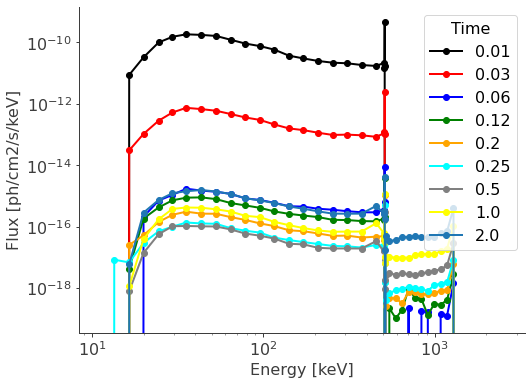

In [6]:
for i in range(9):
    plt.plot(ecen,f_arr_all[5,i,:],'-o',label=t_arr[i])
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Time')
plt.xlabel('Energy [keV]')
plt.ylabel('Flux [ph/cm2/s/keV]')

<h3>Separate model for CO white dwarf with only 0.8 solar masses</h3>

In [7]:
dfCO08 = pd.read_csv('spectra_LOGS_Mesa45_CO080_mixCO05b_mdot1e-9.csv')

In [8]:
t_arr_CO, ecen_CO, ewid_CO, f_arr_CO = make_arrays(dfCO08)

Text(0, 0.5, 'Flux [ph/cm2/s/keV]')

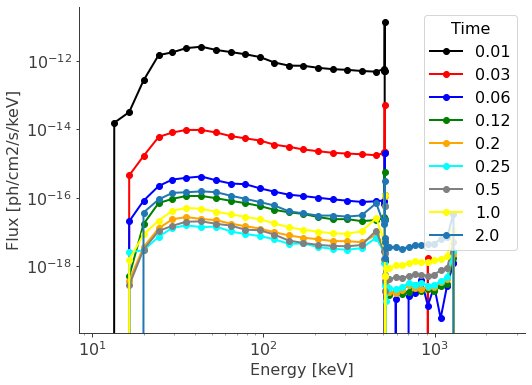

In [9]:
for i in range(9):
    plt.plot(ecen,f_arr_CO[i,:],'-o',label=t_arr[i])
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Time')
plt.xlabel('Energy [keV]')
plt.ylabel('Flux [ph/cm2/s/keV]')

<h3>And for a ONe white dwarf:</h3>

In [10]:
dfONe12 = pd.read_csv('spectra_LOGS_Mesa45_ONe120_mixCO05b_mdot1e-9.csv')

In [11]:
t_arr_ONe, ecen_ONe, ewid_ONe, f_arr_ONe = make_arrays(dfONe12)

Text(0, 0.5, 'Flux [ph/cm2/s/keV]')

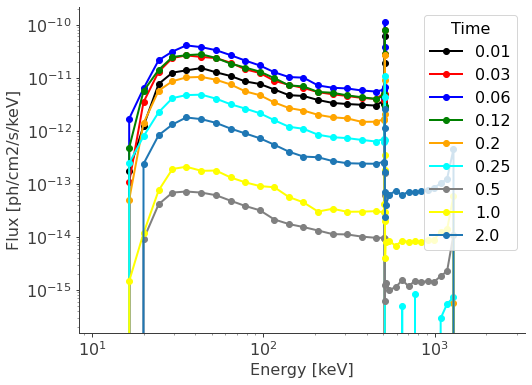

In [12]:
for i in range(9):
    plt.plot(ecen,f_arr_ONe[i,:],'-o',label=t_arr[i])
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Time')
plt.xlabel('Energy [keV]')
plt.ylabel('Flux [ph/cm2/s/keV]')

<h3>Plotting lightcurve for 511 keV line and total spectrum:</h3>

Text(0, 0.5, 'Flux [ph/cm2/s]')

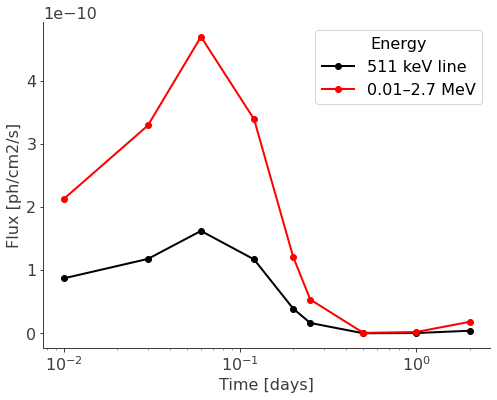

In [13]:
plt.plot(t_arr,np.sum(f_arr_ONe[:,np.where((ecen > 507) & (ecen < 515))[0]],axis=1),'o-',label='511 keV line')
plt.plot(t_arr,np.sum(f_arr_ONe[:,:],axis=1),'o-',label='0.01–2.7 MeV')
plt.xscale('log')
plt.legend(title='Energy')
plt.xlabel('Time [days]')
plt.ylabel('Flux [ph/cm2/s]')

<h3>Here the peak is around day 0.06</h3>

<h3>Create a model out of the spectra to be used in 3ML:</h3>

In [14]:
# define the name, energies, and parameters of the model
from astromodels import TemplateModelFactory

tmf = TemplateModelFactory(
    "ONe_Nova", "ONe_Nova", ecen*u.keV, ["t"]
)

In [15]:
# parameters
t_arr = t_arr #nothing to change here

# add parameter definition to the table model
tmf.define_parameter_grid("t",t_arr)

In [16]:
# calculate (add) model to factory
for t_idx in range(len(t_arr)):
    tmf.add_interpolation_data(f_arr_ONe[t_idx,:],t=t_arr[t_idx])

[WARNING ] You have zeros in the differential flux. Since the interpolation happens in the log space, this cannot be accepted. We will substitute zeros with 1e-50
[WARNING ] You have zeros in the differential flux. Since the interpolation happens in the log space, this cannot be accepted. We will substitute zeros with 1e-50
[WARNING ] You have zeros in the differential flux. Since the interpolation happens in the log space, this cannot be accepted. We will substitute zeros with 1e-50
[WARNING ] You have zeros in the differential flux. Since the interpolation happens in the log space, this cannot be accepted. We will substitute zeros with 1e-50
[WARNING ] You have zeros in the differential flux. Since the interpolation happens in the log space, this cannot be accepted. We will substitute zeros with 1e-50
[WARNING ] You have zeros in the differential flux. Since the interpolation happens in the log space, this cannot be accepted. We will substitute zeros with 1e-50
[WARNING ] You have ze

In [17]:
# save model
tmf.save_data(overwrite=True)

from astromodels import TemplateModel

# load saved model
reloaded_table_model = TemplateModel("ONe_Nova")

In [18]:
reloaded_table_model

* description: ONe_Nova
  * formula: n.a.
  * parameters:
    * K:
      * value: 1.0
      * desc: None
      * min_value: null
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 0.1
      * free: true
    * scale:
      * value: 1.0
      * desc: None
      * min_value: null
      * max_value: null
      * unit: ''
      * is_normalization: false
      * delta: 0.1
      * free: true
    * t:
      * value: 0.2
      * desc: None
      * min_value: 0.01
      * max_value: 2.0
      * unit: ''
      * is_normalization: false
      * delta: 0.020000000000000004
      * free: true

<h3>The only free parameter will be the amplitude ($K$), and we fix all the others:</h3>

In [19]:
reloaded_table_model.scale.fix = True
reloaded_table_model.t = 0.862 # time at day 0.862 (not included in the files)
reloaded_table_model.t.fix = True

Text(0, 0.5, 'Flux [ph/cm2/s/keV]')

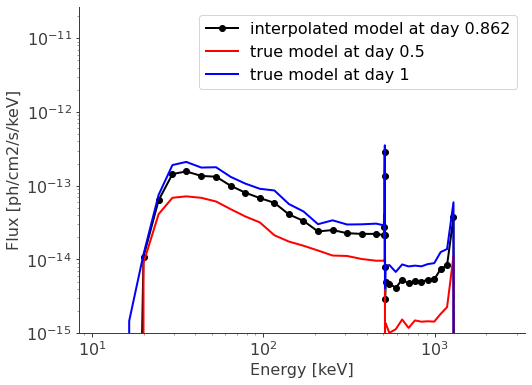

In [20]:
plt.loglog(ecen,reloaded_table_model(ecen),'o-',label='interpolated model at day 0.862')
plt.loglog(ecen,f_arr_ONe[6,:],'-',label='true model at day 0.5')
plt.loglog(ecen,f_arr_ONe[7,:],'-',label='true model at day 1')
plt.ylim(1e-15)
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Flux [ph/cm2/s/keV]')

<h3>Also create model for Hernanz+2014 (higher fluxes)</h3>

In [21]:
dfh = pd.read_csv('spectra_Hernanz_model.csv')

In [22]:
t_arr_MH, ecen_MH, ewid_MH, f_arr_MH = make_arrays(dfh)

Text(0, 0.5, 'Flux [ph/cm2/s]')

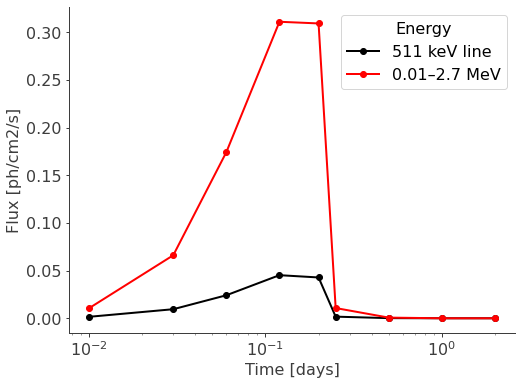

In [23]:
plt.plot(t_arr,np.sum(f_arr_MH[:,np.where((ecen > 507) & (ecen < 515))[0]],axis=1),'o-',label='511 keV line')
plt.plot(t_arr,np.sum(f_arr_MH[:,:],axis=1),'o-',label='0.01–2.7 MeV')
plt.xscale('log')
plt.legend(title='Energy')
plt.xlabel('Time [days]')
plt.ylabel('Flux [ph/cm2/s]')

<h3>Here the peak is at day between day 0.12 and 0.20</h3>

In [24]:
# define the name, energies, and parameters of the model
from astromodels import TemplateModelFactory

tmf = TemplateModelFactory(
    "CO_Nova_Hernanz2014", "CO_Nova_Hernanz2014", ecen_MH*u.keV, ["t"]
)

# parameters
t_arr = t_arr #nothing to change here

# add parameter definition to the table model
tmf.define_parameter_grid("t",t_arr)

# calculate (add) model to factory
for t_idx in range(len(t_arr)):
    tmf.add_interpolation_data(f_arr_MH[t_idx,:],t=t_arr[t_idx])
    
# save model
tmf.save_data(overwrite=True)

from astromodels import TemplateModel

# load saved model
reloaded_table_model2 = TemplateModel("CO_Nova_Hernanz2014")

[WARNING ] You have zeros in the differential flux. Since the interpolation happens in the log space, this cannot be accepted. We will substitute zeros with 1e-50
[WARNING ] You have zeros in the differential flux. Since the interpolation happens in the log space, this cannot be accepted. We will substitute zeros with 1e-50
[WARNING ] You have zeros in the differential flux. Since the interpolation happens in the log space, this cannot be accepted. We will substitute zeros with 1e-50
[WARNING ] You have zeros in the differential flux. Since the interpolation happens in the log space, this cannot be accepted. We will substitute zeros with 1e-50
[WARNING ] You have zeros in the differential flux. Since the interpolation happens in the log space, this cannot be accepted. We will substitute zeros with 1e-50
[WARNING ] You have zeros in the differential flux. Since the interpolation happens in the log space, this cannot be accepted. We will substitute zeros with 1e-50
[WARNING ] You have ze

<h3>Same as above:</h3>

In [25]:
reloaded_table_model2.scale.fix = True
reloaded_table_model2.t = 0.165
reloaded_table_model2.t.fix = True

Text(0, 0.5, 'Flux [ph/cm2/s/keV]')

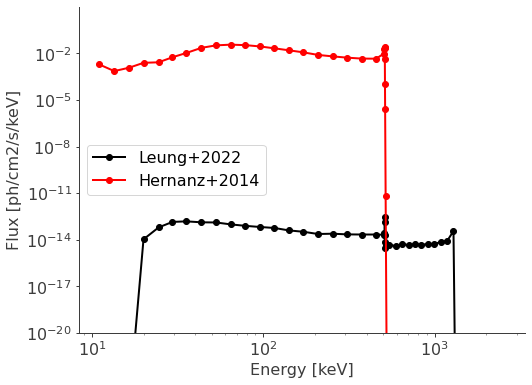

In [26]:
plt.loglog(ecen,reloaded_table_model(ecen),'o-',label='Leung+2022')
plt.loglog(ecen,reloaded_table_model2(ecen),'o-',label='Hernanz+2014')
plt.ylim(1e-20)
plt.legend()
plt.xlabel('Energy [keV]')
plt.ylabel('Flux [ph/cm2/s/keV]')